# Project: Wrangling and Analyze Data

## Data Gathering
In the cell below, data is gather from three different data sources for this project. This datais then loaded into the notebook. **Note:** the methods required to gather each data are different. This methods includes

1. Directly downloading the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv) online

In [95]:
""" In this section of the code, we import all the necessary packages/libraries 
that is require for the project
"""
import pandas as pd
import numpy as np
import requests
import tweepy
import json
import configparser

In [96]:
"""In the section below, the downloaded Twitter Twitter achieve file is read/loaded
into a pandas dataframe"""
twit_archive = pd.read_csv('twitter_archive_enhanced.csv')

In [97]:
# Below, the achive file is display in a datafrom using the head function
twit_archive.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None


2. Programmatically downloading the tweet image prediction TSV file which is hosted on Udacity's servers. This is done using the imported request library 

In [98]:
#In this section, the impage url is assigned to a variable 'img_url'
img_url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'

In [99]:
"""The content from the variable (img_url) is retrieved programmatically
and stored in a variable using the get function of the request library"""
response = requests.get(img_url)

In [100]:
"""Here the data/content from the response variable is written into a new 
TSV file. The with statement is used to handle the automatic closing of the opened file"""

with open('image_predictions.tsv','wb') as file:
    file.write(response.content)

In [101]:
"""The content of the dataframe is read into a dataframe and separated 
by a tab"""
image_prediction = pd.read_csv('image_predictions.tsv', sep='\t')

In [102]:
# This section displays the top 5 image_prediction dataframe content
image_prediction.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


3. The use of the Tweepy library to query additional data via the Twitter API.
In this section, additional date will be download from the WeRateDogs twitter archive using the Twitter API. The retweet count, and favorite count will be filtered from the data that will be downloaded from the twit. Also, the content will be programatically saved into tweet JSON file. Furthermore, the project requires that API keys, secrets, and tokens are not included in the project files. Hence, the config file which stores the details used to query the Twitter API will be deleted and the corresponding section commented within the code section.

In [103]:
"""Here an instance of the configparser is created and the configuration file is read
for authentication and access to the twitter archive. This section is comment based on the project requirement"""
# api_config = configparser.ConfigParser()
# api_config.read('config.ini')

'Here an instance of the configparser is created and the configuration file is read\nfor authentication and access to the twitter archive. This section is comment based on the project requirement'

In [104]:
""" In this section the api key and the api key secret from the config file is copied to a variable.
This section is comment out based on the project requirement"""

#api_key = api_config['twitter']['api_key']
#api_key_secret = api_config['twitter']['api_key_secret']

' In this section the api key and the api key secret from the config file is copied to a variable.\nThis section is comment out based on the project requirement'

In [105]:
"""In this section the access token and access token secret  from the config file is copied to a variable.
This section is comment out based on the project requirement """

#access_token = api_config['twitter']['access_token']
#access_token_secret =  api_config['twitter']['access_token_secret']

'In this section the access token and access token secret  from the config file is copied to a variable.\nThis section is comment out based on the project requirement '

In [106]:
"""Here the authentication parameters are define using values from configuration file
and the tweepy library function. This section is comment out based on the project requirement"""

#authenticate = tweepy.OAuthHandler(api_key,api_key_secret)
#authenticate.set_access_token(access_token,access_token_secret)
#api = tweepy.API(authenticate)

'Here the authentication parameters are define using values from configuration file\nand the tweepy library function. This section is comment out based on the project requirement'

In [107]:
#In this section the tweet ID is extracted from the archive and stored in a variable
tweet_id_list = twit_archive.tweet_id.values

In [108]:
# Here the list of the tweet ID is displayed
tweet_id_list

array([892420643555336193, 892177421306343426, 891815181378084864, ...,
       666033412701032449, 666029285002620928, 666020888022790149])

In [109]:
"""In this section, the _json part of the tweets are being written into a text file based on 
tweet ID using a for loop. The try and except block is used to check and handled error. 
This section is comment out based on the project requirement'"""

"""with open('tweet_json.txt', 'w') as file:
    for tw_id in tweet_id_list:
        try:
            tweet_status = api.get_status(tw_id,tweet_mode='extended')
            json.dump(tweet_status._json, file)
            file.write('\n')
        except Exception as err:
            pass
"""

"with open('tweet_json.txt', 'w') as file:\n    for tw_id in tweet_id_list:\n        try:\n            tweet_status = api.get_status(tw_id,tweet_mode='extended')\n            json.dump(tweet_status._json, file)\n            file.write('\n')\n        except Exception as err:\n            pass\n"

In [110]:
"""In this section the tweet_json.txt content is read line by line 
into a list variable"""
df_tweets = []
with open('tweet_json.txt','r') as txtfile:
    for tweet_line in txtfile:
        json_data = json.loads(tweet_line)
        df_tweets.append({'tweet_id': json_data['id'],
                         'retweet_count': json_data['retweet_count'],
                         'favorite_count': json_data['favorite_count']})

In [111]:
#This section creates a dataframe and stores the tweets in it
df_api = pd.DataFrame(df_tweets)
df_api.head()                       # This line displays the data using the head()

,favorite_count,retweet_count,tweet_id
0,33643,6961,892420643555336193
1,29198,5267,892177421306343426
2,21956,3463,891815181378084864
3,36712,7176,891689557279858688
4,35107,7707,891327558926688256


## Assessing Data
In this section, the already gathered data will be assessed **both** visually and programmatically in order detect and document issues. Aleast **ten () quality issues and two (2) tidiness issue** is dentified. uring this process (as the project requires), only original ratings (no retweets) that have images will be kept.

For the visual assessment, each piece of data gathered will be displayed in the Jupyter Notebook. Also, the files (.txtx and csv) will also be assessed using text editor and excel respectively.

However, the programmatic assessment will include the use of pandas' functions and/or methods for assessing the data.


> ### Visual Assessment
The content of the dataset are displayed and assessed for quality and tidiness issue

In [112]:
# Here the data from the twitter_archive dataset is displayed for visual assessment
twit_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [113]:
#Here the data from the Image prediction dataset is displayed for visual assessment
image_prediction

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [114]:
# Here the content of the data gathered thru the Tweeter API is display for visual assessment
df_api

,favorite_count,retweet_count,tweet_id
0,33643,6961,892420643555336193
1,29198,5267,892177421306343426
2,21956,3463,891815181378084864
3,36712,7176,891689557279858688
4,35107,7707,891327558926688256
5,17727,2583,891087950875897856
6,10307,1644,890971913173991426
7,56602,15665,890729181411237888
8,24398,3599,890609185150312448
9,27824,6060,890240255349198849


> ### Programmatic Assessment
In this section, the content of the data are assessed programmatically using various pandas functions and other functions for quality and tidiness issues

> #### Twitter archive data (twitter_archive_enhanced.csv) online

In [115]:
#This section assesses summary information about the dataset
twit_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [116]:
# In this section, the expanded url column is checked for nul values
twit_archive[twit_archive['expanded_urls'].isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@NonWhiteHat @MayhewMayhem omg hello tanner yo...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
64,879674319642796034,8.795538e+17,3.105441e+09,2017-06-27 12:14:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@RealKentMurphy 14/10 confirmed,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
113,870726314365509632,8.707262e+17,1.648776e+07,2017-06-02 19:38:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@ComplicitOwl @ShopWeRateDogs &gt;10/10 is res...,NaN,NaN,NaN,NaN,10,10,None,None,None,None,None
148,863427515083354112,8.634256e+17,7.759620e+07,2017-05-13 16:15:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Jack_Septic_Eye I'd need a few more pics to p...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
179,857214891891077121,8.571567e+17,1.806710e+08,2017-04-26 12:48:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Marc_IRL pixelated af 12/10,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
185,856330835276025856,NaN,NaN,2017-04-24 02:15:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Jenna_Marbles: @dog_rates Thanks for ratin...,8.563302e+17,66699013.0,2017-04-24 02:13:14 +0000,NaN,14,10,None,None,None,None,None
186,856288084350160898,8.562860e+17,2.792810e+08,2017-04-23 23:26:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@xianmcguire @Jenna_Marbles Kardashians wouldn...,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None
189,855860136149123072,8.558585e+17,1.361572e+07,2017-04-22 19:05:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@s8n You tried very hard to portray this good ...,NaN,NaN,NaN,NaN,666,10,None,None,None,None,None


In [117]:
# The code checks for duplicate rows in the Twitter archive dataset
sum(twit_archive.duplicated())

0

In [118]:
#Here the Twitter archive dataset displays top 5 rows using the head function
twit_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [119]:
# This codedisplays a descriptive statistics summary of the dataframe
twit_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [120]:
# This code show the last 5 rows of the data using the tail()
twit_archive.tail()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


In [121]:
# This code shows ten (10) random row from the dataset
twit_archive.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
602,798644042770751489,NaN,NaN,2016-11-15 21:49:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Paull. He just stubbed ...,6.704450e+17,4.196984e+09,2015-11-28 03:31:48 +0000,https://twitter.com/dog_rates/status/670444955...,10,10,Paull,None,None,None,None
1569,687807801670897665,NaN,NaN,2016-01-15 01:25:33 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Trooper &amp; Maya. Trooper protects Maya...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/687807801...,11,10,Trooper,None,None,None,None
1905,674606911342424069,6.744689e+17,4.196984e+09,2015-12-09 15:09:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The 13/10 also takes into account this impecca...,NaN,NaN,NaN,NaN,13,10,None,None,None,None,None
1000,747963614829678593,NaN,NaN,2016-06-29 01:23:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",PUPPER NOOOOO BEHIND YOUUU 10/10 pls keep this...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/747963614...,10,10,None,None,None,pupper,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
1602,685973236358713344,NaN,NaN,2016-01-09 23:55:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Lorelei. She's contemplating her exist...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/685973236...,11,10,Lorelei,None,None,None,None
1974,673148804208660480,NaN,NaN,2015-12-05 14:35:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Fletcher. He's had a ruff night. No mo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/673148804...,8,10,Fletcher,None,None,pupper,None
1498,692417313023332352,NaN,NaN,2016-01-27 18:42:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Herschel. He's slightly bigger than ur av...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/692417313...,7,10,Herschel,None,None,pupper,None
772,776477788987613185,NaN,NaN,2016-09-15 17:48:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Huck. He's addicted to caffeine. Hope ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/776477788...,11,10,Huck,None,None,pupper,None
1054,742423170473463808,NaN,NaN,2016-06-13 18:27:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bell. She likes holding hands. 12/10 w...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/742423170...,12,10,Bell,None,None,None,None


> #### Image Prediction Data

In [122]:
# This code presents information about the data
image_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [123]:
# This code list top 5 rows in the dataset
image_prediction.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [124]:
# This codedisplays a descriptive statistics summary of the dataframe
image_prediction.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [125]:
# This code displays the last 5 rows in the dataframe
image_prediction.tail()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


In [126]:
# This section displays ten (10) random rows in the dataframe
image_prediction.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1796,831322785565769729,https://pbs.twimg.com/media/C4lzqQ4UEAApzU0.jpg,1,Old_English_sheepdog,0.999715,True,Tibetan_terrier,0.000046,True,guinea_pig,0.000041,False
99,667773195014021121,https://pbs.twimg.com/media/CURoLrOVEAAaWdR.jpg,1,West_Highland_white_terrier,0.360465,True,pug,0.093494,True,ice_bear,0.069038,False
1802,832032802820481025,https://pbs.twimg.com/media/C4v5a4UWcAIRygc.jpg,1,whippet,0.601712,True,Ibizan_hound,0.152662,True,Italian_greyhound,0.135055,True
699,684594889858887680,https://pbs.twimg.com/media/CYAra7JWsAACPZH.jpg,1,Weimaraner,0.948688,True,English_setter,0.035352,True,Brittany_spaniel,0.003879,True
344,672267570918129665,https://pbs.twimg.com/media/CVRfyZxWUAAFIQR.jpg,1,Irish_terrier,0.716932,True,miniature_pinscher,0.051234,True,Airedale,0.044381,True
1332,757725642876129280,https://pbs.twimg.com/media/CoP7c4bWcAAr55g.jpg,2,seat_belt,0.425176,False,Labrador_retriever,0.128128,True,Siamese_cat,0.091241,False
739,687127927494963200,https://pbs.twimg.com/media/CYkrNIVWcAMswmP.jpg,1,pug,0.178205,True,Chihuahua,0.149164,True,Shih-Tzu,0.120505,True
1042,712438159032893441,https://pbs.twimg.com/media/CeMWubMWwAA6GwF.jpg,1,ice_bear,0.869477,False,Great_Pyrenees,0.069457,True,Labrador_retriever,0.024740,True
333,672160042234327040,https://pbs.twimg.com/media/CVP9_beUEAAwURR.jpg,1,pug,0.561027,True,French_bulldog,0.222114,True,Labrador_retriever,0.065456,True
763,688908934925697024,https://pbs.twimg.com/media/CY9_BOYWkAAkuzn.jpg,1,crane,0.158859,False,pier,0.130016,False,bell_cote,0.087741,False


> #### Twitter API Data Assessment

In [127]:
# This code displays information about the data
df_api.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 873 entries, 0 to 872
Data columns (total 3 columns):
favorite_count    873 non-null int64
retweet_count     873 non-null int64
tweet_id          873 non-null int64
dtypes: int64(3)
memory usage: 20.5 KB


In [128]:
# This code displays top 5 rows in the dataframe
df_api.head()

,favorite_count,retweet_count,tweet_id
0,33643,6961,892420643555336193
1,29198,5267,892177421306343426
2,21956,3463,891815181378084864
3,36712,7176,891689557279858688
4,35107,7707,891327558926688256


In [129]:
# This codedisplays a descriptive statistics summary of the dataframe
df_api.describe()

,favorite_count,retweet_count,tweet_id
count,873.000000,873.000000,8.730000e+02
mean,12932.670103,4325.495991,8.201381e+17
std,13544.981590,4869.140002,3.687956e+16
min,0.000000,1.000000,7.588287e+17
25%,4979.000000,1797.000000,7.895992e+17
50%,9870.000000,2953.000000,8.185365e+17
75%,18182.000000,5061.000000,8.482121e+17
max,123523.000000,51344.000000,8.924206e+17


In [130]:
# This code displays the last 5 rows in the dataframe
df_api.tail()

,favorite_count,retweet_count,tweet_id
868,0,1064,759159934323924993
869,13574,3798,759099523532779520
870,6046,1839,759047813560868866
871,3311,835,758854675097526272
872,10430,3536,758828659922702336


In [131]:
# This section displays ten (10) random rows in the dataframe
df_api.sample(10)

,favorite_count,retweet_count,tweet_id
801,6011,1552,769695466921623552
325,0,8552,832215726631055365
255,18356,5007,841320156043304961
248,6274,1174,842765311967449089
385,14163,3550,824297048279236611
565,26770,12243,800018252395122689
16,25481,3739,888917238123831296
710,9829,2505,781661882474196992
684,6312,1663,785872687017132033
358,2059,165,828361771580813312


### Quality issues
#### Tweet Archive
1. Timestamp is used as column name which is not descriptive enough

2. Timestamp datatype is declared as an object instead of datatme

3. tweet_id datatype is declared as int instead of an object.

4. Dog name contain inaccurate/invalid name such as a, the, by, his, O, such

5. 181 retweets found based on retweeted_status_id

#### Image Prediction
1. Underscore in p1, p2, and p3 values instead of spaces

2. Some values in p1, p2, and p3 start with lower case while some start with upper case.

3. tweet_id datatype is declared as int instead of an object.

4. jpg_url is not descriptive/understandable
 
#### Tweeter API
1. tweet_id datatype is declared as int instead of an object.

### Tidiness issues
1. Dog stages (doggo, floofer, pupper, puppo) stored separately in multiple columns

2. Datasets are stored separately, although the represent one observational unit and should be merged.All dataset related and  should be merged

## Cleaning Data
In this section, **all** issues that is documented while assessing will be cleaned. A copy of the original data will be made before commencing the cleaning process. After cleaning the data, all the data will me merged to form an observational unit.

In [132]:
# In this section a copies of original pieces of data is made
twit_archive_clean = twit_archive.copy()
image_prediction_clean = image_prediction.copy()
df_api_clean = df_api.copy()

### Issue #1: 
Timestamp is used as column name which is not descriptive

#### Define:
Change the timestamp column name to tweet_date to make it more descriptive. However timestamp is a default name used interchangeably with datatime

#### Code

In [133]:
# This code changes the column name from timestamp ot tweet_date
twit_archive_clean = twit_archive_clean.rename(columns = {'timestamp':'tweet_date'})

#### Test

In [134]:
# This code dsiplays top 2 rows to show the updated column name
twit_archive_clean.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,tweet_date,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None


### Issue #2:
tweet_date datatype is declared as an object instead of datatme

#### Define
Change tweet_date datatype from string to datetime data type, as string is not the standard type for storing datestime.

#### Code

In [135]:
#This code changes the tweet_date data type from object to datetime
twit_archive_clean['tweet_date'] = twit_archive_clean['tweet_date'].astype('datetime64[ns]')

#### Test

In [136]:
# This code displays all the daa types for the data
twit_archive_clean.dtypes

tweet_id                               int64
in_reply_to_status_id                float64
in_reply_to_user_id                  float64
tweet_date                    datetime64[ns]
source                                object
text                                  object
retweeted_status_id                  float64
retweeted_status_user_id             float64
retweeted_status_timestamp            object
expanded_urls                         object
rating_numerator                       int64
rating_denominator                     int64
name                                  object
doggo                                 object
floofer                               object
pupper                                object
puppo                                 object
dtype: object

In [137]:
#
#twit_archive_clean['year'] = twit_archive_clean['tweet_date'].dt.year
#twit_archive_clean.head()

### Issue #3:
tweet_id datatype is declared as int instead of an object.

#### Define
Change tweet_id datatype from int to string/object data type.

#### Code

In [138]:
# This code changes tweet_id data type from int to object/string
twit_archive_clean['tweet_id'] = twit_archive_clean['tweet_id'].astype('str')

#### Test

In [139]:
# This code dislays all the data types
twit_archive_clean.dtypes

tweet_id                              object
in_reply_to_status_id                float64
in_reply_to_user_id                  float64
tweet_date                    datetime64[ns]
source                                object
text                                  object
retweeted_status_id                  float64
retweeted_status_user_id             float64
retweeted_status_timestamp            object
expanded_urls                         object
rating_numerator                       int64
rating_denominator                     int64
name                                  object
doggo                                 object
floofer                               object
pupper                                object
puppo                                 object
dtype: object

### Issue #4:
Dog name contain inaccurate/invalid name such as a, the, by, his, O, such 

#### Define
During the visual and programmatic assessment, it is discovered that dog name were not properly documented as such there were dogs with names like a, by, his, O, such, actually, all. All these names will be replace with none using pandas replace function.

#### Code

In [140]:
# This code change certain dog name value to none
twit_archive_clean.name = twit_archive_clean.name.replace('a', 'None')
twit_archive_clean.name = twit_archive_clean.name.replace('O', 'None')
twit_archive_clean.name = twit_archive_clean.name.replace('such', 'None')
twit_archive_clean.name = twit_archive_clean.name.replace('by', 'None')
twit_archive_clean.name = twit_archive_clean.name.replace('his', 'None')
twit_archive_clean.name = twit_archive_clean.name.replace('an', 'None')
twit_archive_clean.name = twit_archive_clean.name.replace('the', 'None')

#### Test

In [141]:
#This code counts the names of the dogs
twit_archive_clean.name.value_counts()

None         819
Charlie       12
Oliver        11
Cooper        11
Lucy          11
Penny         10
Lola          10
Tucker        10
Winston        9
Bo             9
Sadie          8
Buddy          7
Bailey         7
Daisy          7
Toby           7
Stanley        6
Bella          6
Dave           6
Rusty          6
Jack           6
Leo            6
Jax            6
Scout          6
Oscar          6
Koda           6
Milo           6
Gus            5
Oakley         5
Finn           5
George         5
            ... 
Alf            1
Herb           1
Joshwa         1
Carbon         1
Severus        1
Kulet          1
Corey          1
Kevon          1
Mya            1
Mo             1
Mookie         1
Sparky         1
Dook           1
William        1
Fletcher       1
Banditt        1
Billy          1
Randall        1
Moofasa        1
Lassie         1
Darrel         1
Shnuggles      1
Jameson        1
Rhino          1
Peanut         1
Timmy          1
Huxley         1
Gerbald       

### Issue #5
181 retweets found based on retweeted_status_id

#### Define
Rows with retweet Id will be deleted. Also, columns related to retweet (retweeted_status_id, retweeted_status_timestamp and retweeted_status_user_id) will be deleted as they are null 

#### Code

In [142]:
#This code all null rows with retweet status id
twit_archive_clean = twit_archive_clean[twit_archive_clean.retweeted_status_id.isnull()]

#This code drops retweeted_status_id, retweeted_status_timestamp and retweeted_status_user_id columns
twit_archive_clean = twit_archive_clean.drop(columns=['retweeted_status_id','retweeted_status_timestamp','retweeted_status_user_id'])

# This code drops the reply rows
twit_archive_clean = twit_archive_clean.drop(columns=['in_reply_to_status_id','in_reply_to_user_id'])

#### Test

In [143]:
#This code displays information about the dataframe
twit_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2175 non-null object
tweet_date            2175 non-null datetime64[ns]
source                2175 non-null object
text                  2175 non-null object
expanded_urls         2117 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  2175 non-null object
doggo                 2175 non-null object
floofer               2175 non-null object
pupper                2175 non-null object
puppo                 2175 non-null object
dtypes: datetime64[ns](1), int64(2), object(9)
memory usage: 220.9+ KB


### Image Prediction Data

### Issue #:1
Underscore in p1, p2, and p3 values instead of spaces

#### Define
Column p1, p2, and p3 do not follow the standard for data input by using values with "_" hence this will be replaced with a space(s) " " using the **pandas replace** function.

#### Code

In [144]:
#This section replaces all underscore "_" in the p1, p2, and p3 column with space(s)
image_prediction_clean.p1 = image_prediction_clean.p1.replace('_', ' ', regex=True)
image_prediction_clean.p2 = image_prediction_clean.p2.replace('_', ' ', regex=True)
image_prediction_clean.p3 = image_prediction_clean.p3.replace('_', ' ', regex=True)

#### Test

In [145]:
# This code displays six (6) random rows in the dataframe
image_prediction_clean.sample(6)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
275,670838202509447168,https://pbs.twimg.com/media/CU9LyIMWIAA6OOu.jpg,1,flamingo,0.992710,False,coral fungus,0.003491,False,stinkhorn,0.001859,False
1295,751937170840121344,https://pbs.twimg.com/media/Cm9q2d3XEAAqO2m.jpg,1,Lakeland terrier,0.424168,True,teddy,0.260562,False,golden retriever,0.127432,True
443,674638615994089473,https://pbs.twimg.com/media/CVzMPh1UsAELQ_p.jpg,1,Pomeranian,0.846986,True,chow,0.142014,True,keeshond,0.002605,True
1500,783839966405230592,https://pbs.twimg.com/media/CuDCSM-XEAAJw1W.jpg,1,quilt,0.333739,False,Siamese cat,0.136245,False,three-toed sloth,0.117464,False
1962,866686824827068416,https://pbs.twimg.com/media/DAcXEWuXkAIBDGJ.jpg,1,flat-coated retriever,0.514730,True,groenendael,0.306407,True,curly-coated retriever,0.061314,True
1258,748692773788876800,https://pbs.twimg.com/media/CmPkGhFXEAABO1n.jpg,1,ox,0.337871,False,plow,0.269287,False,oxcart,0.245653,False


### Issue #2:
Some values in p1, p2, and p3 start with lower case while some start with upper case.

#### Define
Values in p1, p2 and p3 are inconsistent. Hence to ensure consistency, the first character/word in the columns values will be capitalised using the **string capitalise** function

#### Code

In [146]:
# This code capitalises the first character in the coluns
image_prediction_clean['p1'] = image_prediction_clean['p1'].str.capitalize()
image_prediction_clean['p2'] = image_prediction_clean['p2'].str.capitalize()
image_prediction_clean['p3'] = image_prediction_clean['p3'].str.capitalize()

#### Test

In [147]:
# This code displays six (6) random rows in the dataframe
image_prediction_clean.sample(6)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
37,666454714377183233,https://pbs.twimg.com/media/CT-5Bs-WUAA2JeC.jpg,1,Dalmatian,0.278954,True,Labrador retriever,0.237612,True,Great pyrenees,0.171106,True
1869,844580511645339650,https://pbs.twimg.com/media/C7iNfq1W0AAcbsR.jpg,1,Washer,0.903064,False,Dishwasher,0.032489,False,Printer,0.016456,False
1901,851591660324737024,https://pbs.twimg.com/media/C9F2FG5WAAAJ0iN.jpg,1,Cardigan,0.394507,True,Chihuahua,0.077254,True,French bulldog,0.076559,True
875,698195409219559425,https://pbs.twimg.com/media/CbB9BTqW8AEVc2A.jpg,1,Labrador retriever,0.643690,True,American staffordshire terrier,0.102684,True,Dalmatian,0.050008,True
1894,849776966551130114,https://pbs.twimg.com/media/C8sDpDWWsAE5P08.jpg,2,Chihuahua,0.292092,True,Toy terrier,0.136852,True,Bonnet,0.103111,False
1664,812466873996607488,https://pbs.twimg.com/media/C0Z2T_GWgAAxbL9.jpg,1,Bath towel,0.099804,False,Pillow,0.092318,False,Great dane,0.078205,True


### Issue #3:
The tweet_id datatype in the image prediction dataset is declared as int instead of an object.

#### Define
Change tweet_id datatype from int to string/object data type.

#### Code

In [148]:
# This code changes the Image preidction tweet_id from int to /objectstring
image_prediction_clean['tweet_id'] = image_prediction_clean['tweet_id'].astype('str')

#### Test

In [149]:
# This code displays all the columns data types
image_prediction_clean.dtypes

tweet_id     object
jpg_url      object
img_num       int64
p1           object
p1_conf     float64
p1_dog         bool
p2           object
p2_conf     float64
p2_dog         bool
p3           object
p3_conf     float64
p3_dog         bool
dtype: object

### Issue #4
jpg_url is not descriptive/understandable

#### Define
the jpg_url column name should be renamed to image_url to make it more descriptive, understandable and standardized.

#### Code

In [150]:
# This code rename the img_url column name to image_url
image_prediction_clean = image_prediction_clean.rename(columns = {'jpg_url':'image_url'})

# This code filters impage prediction rows that do not have null values
image_prediction_clean = image_prediction_clean[image_prediction_clean.image_url.notnull()]

#### Test

In [151]:
# This code displays information about the data
image_prediction_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id     2075 non-null object
image_url    2075 non-null object
img_num      2075 non-null int64
p1           2075 non-null object
p1_conf      2075 non-null float64
p1_dog       2075 non-null bool
p2           2075 non-null object
p2_conf      2075 non-null float64
p2_dog       2075 non-null bool
p3           2075 non-null object
p3_conf      2075 non-null float64
p3_dog       2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 168.2+ KB


#### Twitter API Data

#### Issue #1
The tweet_id datatype in the Twitter API dataset is declared as int instead of an object.

#### Define
Change tweet_id datatype from int to string/object data type.

#### Code

In [152]:
# Ths code updates the tweet_id data type from into to string
df_api_clean['tweet_id'] = df_api_clean['tweet_id'].astype('str')

#### Test

In [153]:
# This code checks the data types of the tweet_id
df_api_clean.tweet_id.dtypes

dtype('O')

>  ## Tidy

### Issue 1
Dog stages (doggo, floofer, pupper, puppo) stored separately in multiple columns

#### Define
Dog stages column will be created and all dog stages populated in the column using the pandas melt function. 
Thereafter, the var_name will be will be dropped as they will not be needed. Furthermore, duplicated values produced because of the output of the melt function will be dropped.

#### Code

In [154]:
#This code uses the melt function to melt the dog stages into one column and moves that values into a separate column
twit_archive_clean = pd.melt(twit_archive_clean, 
                    id_vars =['tweet_id', 'tweet_date', 'source', 'text', 'expanded_urls', 'rating_numerator', 'rating_denominator','name',],
                    value_vars = ['doggo', 'floofer', 'pupper', 'puppo'], var_name='melted_dog_stage', value_name='dog_stages')

# The code below sorts the values of the dog_stages column
twit_archive_clean = twit_archive_clean.sort_values('dog_stages')

In [155]:
# This code drops the duplicated rows output based on the melt function using the tweet_id but keeps the last occurence.
twit_archive_clean = twit_archive_clean.drop_duplicates(subset=['tweet_id'], keep = 'last')

# This code drops the combined/grouped column
twit_archive_clean = twit_archive_clean.drop('melted_dog_stage', axis = 1)

#### Test

In [156]:
# This code displays 5 random rows in the dataframe
twit_archive_clean.sample(5)

,tweet_id,tweet_date,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stages
2873,762699858130116608,2016-08-08 17:19:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Leela. She's a Fetty Woof. Lost eye wh...,https://twitter.com/dog_rates/status/762699858...,11,10,Leela,None
2844,768970937022709760,2016-08-26 00:38:52,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",This is Kirby. His bowl weighs more than him. ...,https://twitter.com/dog_rates/status/768970937...,12,10,Kirby,None
2751,784057939640352768,2016-10-06 15:49:14,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",This is Balto. He's very content. Legendary to...,https://vine.co/v/5gKxeUpuKEr,12,10,Balto,None
3151,725458796924002305,2016-04-27 22:57:10,"<a href=""http://twitter.com/download/iphone"" r...",Pup had to be removed cuz it wouldn't have bee...,https://twitter.com/foxdeportes/status/7251360...,13,10,None,None
3254,710283270106132480,2016-03-17 01:55:02,"<a href=""http://twitter.com/download/iphone"" r...",This is Gunner. He's a Figamus Newton. King of...,https://twitter.com/dog_rates/status/710283270...,11,10,Gunner,None


### Issue #2
Datasets are stored separately, although the represent one observational unit and should be merged.

#### Define
All dataframes will be merge for Exploration and Visualization purpose, as they represent one observational unit (table) using the pandas merge function.

#### Code

In [157]:
# This Code displays information about the data in the dataframe
image_prediction_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id     2075 non-null object
image_url    2075 non-null object
img_num      2075 non-null int64
p1           2075 non-null object
p1_conf      2075 non-null float64
p1_dog       2075 non-null bool
p2           2075 non-null object
p2_conf      2075 non-null float64
p2_dog       2075 non-null bool
p3           2075 non-null object
p3_conf      2075 non-null float64
p3_dog       2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 168.2+ KB


In [158]:
# This section merges the 3 pieces of data into one using the merge functon
twit_archive_clean = pd.merge(twit_archive_clean, image_prediction_clean, on='tweet_id', how='left')
twit_archive_clean = pd.merge(twit_archive_clean, df_api_clean, on='tweet_id', how='left')

twit_archive_clean  # This line od code displays the merged dataframe

,tweet_id,tweet_date,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stages,image_url,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count
0,667443425659232256,2015-11-19 20:44:47,"<a href=""http://twitter.com/download/iphone"" r...",Exotic dog here. Long neck. Weird paws. Obsess...,https://twitter.com/dog_rates/status/667443425...,6,10,None,None,https://pbs.twimg.com/media/CUM8QZwW4AAVsBl.jpg,...,0.980815,False,Drake,6.917770e-03,False,Hen,5.255170e-03,False,NaN,NaN
1,667453023279554560,2015-11-19 21:22:56,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",Meet Cupcake. I would do unspeakable things fo...,https://twitter.com/dog_rates/status/667453023...,11,10,Cupcake,None,https://pbs.twimg.com/media/CUNE_OSUwAAdHhX.jpg,...,0.825670,True,French bulldog,5.663940e-02,True,Staffordshire bullterrier,5.401840e-02,True,NaN,NaN
2,667455448082227200,2015-11-19 21:32:34,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",This is Reese and Twips. Reese protects Twips....,https://twitter.com/dog_rates/status/667455448...,7,10,Reese,None,https://pbs.twimg.com/media/CUNHMXTU8AAS3HH.jpg,...,0.676376,True,Irish terrier,5.493340e-02,True,Yorkshire terrier,4.057550e-02,True,NaN,NaN
3,667470559035432960,2015-11-19 22:32:36,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",This is a northern Wahoo named Kohl. He runs t...,https://twitter.com/dog_rates/status/667470559...,11,10,None,None,https://pbs.twimg.com/media/CUNU78YWEAECmpB.jpg,...,0.304175,True,Pug,2.234270e-01,True,Lakeland terrier,7.331650e-02,True,NaN,NaN
4,667491009379606528,2015-11-19 23:53:52,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",Two dogs in this one. Both are rare Jujitsu Py...,https://twitter.com/dog_rates/status/667491009...,7,10,None,None,https://pbs.twimg.com/media/CUNniSlUYAEj1Jl.jpg,...,0.852088,True,Ice bear,1.322640e-01,False,Weasel,5.729980e-03,False,NaN,NaN
5,667495797102141441,2015-11-20 00:12:54,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",This is Philippe from Soviet Russia. Commandin...,https://twitter.com/dog_rates/status/667495797...,9,10,Philippe,None,https://pbs.twimg.com/media/CUNr4-7UwAAg2lq.jpg,...,0.143957,True,Christmas stocking,1.186510e-01,False,Ski mask,9.248170e-02,False,NaN,NaN
6,667502640335572993,2015-11-20 00:40:05,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",Say hello to Hall and Oates. Oates is winking ...,https://twitter.com/dog_rates/status/667502640...,11,10,Hall,None,https://pbs.twimg.com/media/CUNyHTMUYAAQVch.jpg,...,0.996709,True,Golden retriever,1.688210e-03,True,Beagle,7.116670e-04,True,NaN,NaN
7,667509364010450944,2015-11-20 01:06:48,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",This a Norwegian Pewterschmidt named Tickles. ...,https://twitter.com/dog_rates/status/667509364...,12,10,None,None,https://pbs.twimg.com/media/CUN4Or5UAAAa5K4.jpg,...,0.636169,True,Labrador retriever,1.192560e-01,True,Golden retriever,8.254920e-02,True,NaN,NaN
8,667517642048163840,2015-11-20 01:39:42,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",This is Dook &amp; Milo. Dook is struggling to...,https://twitter.com/dog_rates/status/667517642...,8,10,Dook,None,https://pbs.twimg.com/media/CUN_wiBUkAAakT0.jpg,...,0.125176,True,Standard poodle,8.457150e-02,True,Cocker spaniel,8.134690e-02,True,NaN,NaN
9,667524857454854144,2015-11-20 02:08:22,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",Another topnotch dog. His name is Big Jumpy Ra...,https://twitter.com/dog_rates/status/667524857...,12,10,None,None,https://pbs.twimg.com/media/CUOGUfJW4AA_eni.jpg,...,0.447893,False,Dhole,9.243530e-02,False,Chesapeake bay retriever,8.812240e-02,True,NaN,NaN


In [159]:
# This code displays information about the daaframe
twit_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2174
Data columns (total 22 columns):
tweet_id              2175 non-null object
tweet_date            2175 non-null datetime64[ns]
source                2175 non-null object
text                  2175 non-null object
expanded_urls         2117 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  2175 non-null object
dog_stages            2175 non-null object
image_url             1994 non-null object
img_num               1994 non-null float64
p1                    1994 non-null object
p1_conf               1994 non-null float64
p1_dog                1994 non-null object
p2                    1994 non-null object
p2_conf               1994 non-null float64
p2_dog                1994 non-null object
p3                    1994 non-null object
p3_conf               1994 non-null float64
p3_dog                1994 non-null object
favorite_count        7

## Storing Data
In this section, the gathered, assessed, and cleaned master dataset will be saved to a CSV file named "twitter_archive_master.csv".

In [160]:
# This code saves the master dataset to a csv file using to_csv funcion
twit_archive_clean.to_csv('twitter_archive_master.csv', index=False)

## Analyzing and Visualizing Data
In this section, the wrangled master data will be analyzed and visualized. Furthermore, **four (4) insights and two (2) visualization.** will be produced.

In [161]:
# This code reads the master csv file into a dataframe 
twit_master = pd.read_csv('twitter_archive_master.csv')

In [162]:
# This code displays information about the data
twit_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2175 entries, 0 to 2174
Data columns (total 22 columns):
tweet_id              2175 non-null int64
tweet_date            2175 non-null object
source                2175 non-null object
text                  2175 non-null object
expanded_urls         2117 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  2175 non-null object
dog_stages            2175 non-null object
image_url             1994 non-null object
img_num               1994 non-null float64
p1                    1994 non-null object
p1_conf               1994 non-null float64
p1_dog                1994 non-null object
p2                    1994 non-null object
p2_conf               1994 non-null float64
p2_dog                1994 non-null object
p3                    1994 non-null object
p3_conf               1994 non-null float64
p3_dog                1994 non-null object
favorite_count        725 non-nu

In [163]:
# This code converts tweet_date datatype from string to datatime
twit_master['tweet_date'] = twit_master['tweet_date'].astype('datetime64[ns]')

In [164]:
# This code displays a descriptive statistics summary of the dataframe
twit_master.describe()

,tweet_id,rating_numerator,rating_denominator,img_num,p1_conf,p2_conf,p3_conf,favorite_count,retweet_count
count,2.175000e+03,2175.000000,2175.000000,1994.000000,1994.000000,1.994000e+03,1.994000e+03,725.000000,725.000000
mean,7.371205e+17,13.215172,10.492874,1.203109,0.593941,1.344195e-01,6.024848e-02,15572.718621,4028.108966
std,6.748668e+16,47.725696,7.019084,0.560777,0.271954,1.006807e-01,5.089067e-02,13408.997541,4700.488006
min,6.660209e+17,0.000000,0.000000,1.000000,0.044333,1.011300e-08,1.740170e-10,59.000000,1.000000
25%,6.768432e+17,10.000000,10.000000,1.000000,0.362857,5.393988e-02,1.619283e-02,7534.000000,1782.000000
50%,7.098528e+17,11.000000,10.000000,1.000000,0.587635,1.174550e-01,4.950530e-02,11812.000000,2782.000000
75%,7.894226e+17,12.000000,10.000000,1.000000,0.846285,1.951377e-01,9.159438e-02,19805.000000,4439.000000
max,8.924206e+17,1776.000000,170.000000,4.000000,1.000000,4.880140e-01,2.734190e-01,123523.000000,51344.000000


In [165]:
# This code count the values of the dog stages excluding the none values
stages = twit_master.dog_stages[twit_master.dog_stages != 'None'].value_counts()
stages         # Displays the output of the code above

pupper     234
doggo       75
puppo       25
floofer     10
Name: dog_stages, dtype: int64

In [166]:
# This code counts and store the values of the dog names excluding the dogs named none values
dog_names = twit_master.name[twit_master.name != 'None'].value_counts().head(10)
dog_names     # This code displays the values o the code above

Charlie    11
Lucy       11
Cooper     10
Oliver     10
Tucker      9
Penny       9
Winston     8
Lola        8
Sadie       8
Daisy       7
Name: name, dtype: int64

In [167]:
# This code stores top ten (10) values of the dog breeds for the first prediction
dog_breeds = twit_master.p1.value_counts()[0:10]
dog_breeds       #This code displays the values from the code above

Golden retriever      139
Labrador retriever     95
Pembroke               88
Chihuahua              79
Pug                    54
Chow                   41
Samoyed                40
Pomeranian             38
Toy poodle             38
Malamute               29
Name: p1, dtype: int64

In [168]:
# This code count the total tweets and group them by years
twit_year = twit_master['tweet_date'].dt.year.value_counts()
twit_year.head()     # This code displays the values of the code above

2016    1088
2015     688
2017     399
Name: tweet_date, dtype: int64

### Insights:
1. Based on the analysis, it is discovered that most of the dogs belong to the pupper stage.

2. The Lucy and Charlie dog names are the commonly used dog names. This is excluding the dogs that were not properly named.

3. The Golden retriever dog breed is the most common dog breed in the first prediction based on the neural network.

4. Based on the analysis, the year 2006 had the highest number of dog tweet while 2017 had the least dog tweetss.

### Visualization

In [169]:
#This section imports the package needed for data visualization
import matplotlib.pyplot as plt
%matplotlib inline

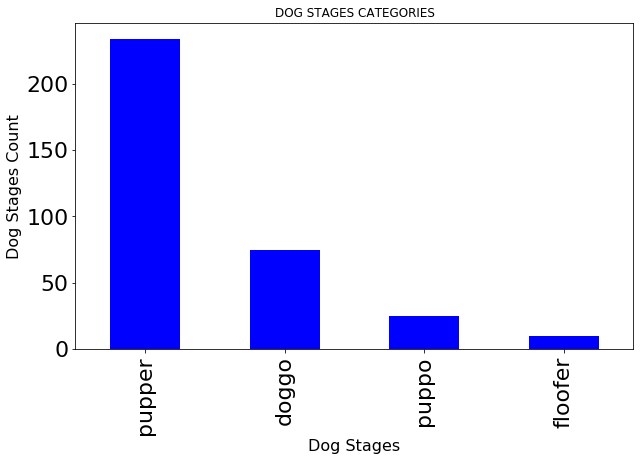

In [170]:
#This code plats a bar chart
stages.plot(kind='bar', title='DOG STAGES CATEGORIES',figsize=(10, 6), fontsize=22, color='blue');
plt.xlabel('Dog Stages', fontsize=16)     #This code define the lable on the horizontal axis
plt.ylabel('Dog Stages Count', fontsize=16); #This code define the lable on the vertical axis

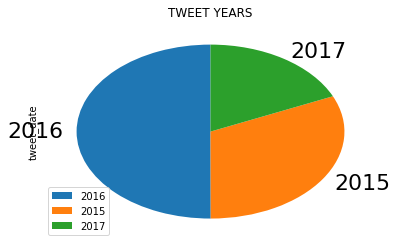

In [171]:
# This code plots a pie to show a visual representation of the tweet years
twit_year.plot(kind='pie', title='TWEET YEARS', fontsize=22, startangle= 90);
plt.legend(loc="lower left")